In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_folder = '../../../idao_2021_train/'
df_aum = pd.read_csv(data_folder + 'aum.csv')
df_balance = pd.read_csv(data_folder + 'balance.csv')
df_client = pd.read_csv(data_folder + 'client.csv')
df_funnel = pd.read_csv(data_folder + 'funnel.csv')
df_payments = pd.read_csv(data_folder + 'payments.csv')

In [3]:
contacts = df_funnel.contacts.values
y = df_funnel.sale_flg.values

# aum.csv

In [436]:
df_aum.head()

client_id month_end_dt  balance_rur_amt      product_code  \
0 -1893104556496814867   2018-12-31             44.0  Current accounts   
1 -1893104556496814867   2019-04-30             44.0  Current accounts   
2 -1893104556496814867   2019-06-30           6115.0  Current accounts   
3 -1893104556496814867   2019-07-31           6115.0  Current accounts   
4 -1893104556496814867   2019-08-31          45685.0  Current accounts   

   current_accounts_bool  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [437]:
df_aum['product_code'].value_counts()

Current accounts    107484
Time account          5529
Broker                1572
UK                    1434
NSJ                   1030
ILI                    343
Name: product_code, dtype: int64

In [27]:
df_aum["current_accounts_bool"] = (df_aum["product_code"] == 'Broker').astype('int64')
df_aum_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["current_accounts_bool"]
df_aum_grouped_max = df_aum_grouped.mean()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_aum_grouped_max["current_accounts_bool"].values

In [28]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_aum_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_aum_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [29]:
y_selected = df_funnel_selected['sale_flg'].values

In [33]:
np.corrcoef(y_selected, feat)

array([[1.        , 0.01023936],
       [0.01023936, 1.        ]])

In [443]:
# df_aum["current_accounts_bool"] = (df_aum["product_code"] == 'Broker').astype('int64')
df_aum_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["balance_rur_amt"]
df_aum_grouped_max = df_aum_grouped.max()
df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_aum_grouped_max["balance_rur_amt"].values

In [444]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_aum_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_aum_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [445]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[1.        , 0.00671777],
       [0.00671777, 1.        ]])

# balance.csv

In [41]:
df_balance.head()

client_id  crncy_cd  eop_bal_sum_rur  min_bal_sum_rur  \
0  7513301859607023584     810.0              0.0              0.0   
1  7513301859607023584     810.0              0.0              0.0   
2  7513301859607023584     810.0              0.0              0.0   
3  7513301859607023584     810.0              0.0              0.0   
4  7513301859607023584     810.0              0.0              0.0   

   max_bal_sum_rur  avg_bal_sum_rur month_end_dt     prod_cat_name  \
0              0.0              0.0   2018-09-30  CURRENT ACCOUNTS   
1              0.0              0.0   2018-09-30  CURRENT ACCOUNTS   
2              0.0              0.0   2018-09-30  CURRENT ACCOUNTS   
3              0.0              0.0   2018-09-30  CURRENT ACCOUNTS   
4              0.0              0.0   2018-09-30  CURRENT ACCOUNTS   

  prod_group_name  SALARY CARDS_bool  
0  Cash on demand                  0  
1  Cash on demand                  0  
2  Cash on demand                  0  
3  Cash on demand                  0  
4  Cash on demand                  0

In [35]:
df_balance['prod_cat_name'].value_counts()

KN                        575203
CURRENT ACCOUNTS          302334
DEPOSITS                  174921
SALARY CARDS               71497
DEBIT CARDS                38824
CREDIT CARDS               17224
MORTGAGE                    7080
TECHNICAL CARDS             3587
CAR LOANS                   1092
CREDITS IN CASH OR           312
Cash on demand               312
CASH CREDITS (X-SALE)        264
OTHER MORTGAGE                48
URGENT DEPOSITS BIN           24
VIP DEBIT CARDS               24
PREAD MAP                     12
LOANS FOR EMPLOYEES           12
LENDING SALARY CLIENTS        12
VIP CREDIT CARDS              12
Name: prod_cat_name, dtype: int64

In [42]:
df_balance["SALARY CARDS_bool"] = (df_balance["prod_cat_name"] == 'SALARY CARDS').astype('int64')
df_balance_grouped = df_balance.groupby(by="client_id", as_index=False, sort=False)["SALARY CARDS_bool"]
df_balance_grouped_mean = df_balance_grouped.mean()
df_balance_grouped_mean = df_balance_grouped_mean.fillna(0)
feat = df_balance_grouped_mean["SALARY CARDS_bool"].values

In [44]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_balance_grouped_mean.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_balance_grouped_mean['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [45]:
y_selected = df_funnel_selected['sale_flg'].values

In [46]:
np.corrcoef(y_selected, feat)

array([[ 1.       , -0.0022445],
       [-0.0022445,  1.       ]])

# client.csv

In [178]:
df_client.head()

client_id gender   age  region  city citizenship  \
0  7513301859607023584      F  33.0       0   115      RUSSIA   
1  9157009756404187626      F  59.0      17   668      RUSSIA   
2 -1893104556496814867      M  51.0      28    65      RUSSIA   
3  6886062013213911831      F  56.0       0    40      RUSSIA   
4 -8156468515495593794      F  34.0      -1    -1      RUSSIA   

             education job_type  
0                  NaN      NaN  
1                  NaN      NaN  
2                  NaN      NaN  
3                  NaN      NaN  
4  HIGHER_PROFESSIONAL      NaN

### education and job type

In [179]:
df_client['education'].value_counts(dropna=False)

NaN                            12218
HIGHER_PROFESSIONAL             4463
MIDDLE_PROFESSIONAL             3550
FULL_GENERAL                     606
HIGHER_PROFESSIONAL_PARTIAL      258
PRIMARY_PROFESSIONAL             238
TWO_AND_MORE_HIGHER              147
SCHOLASTIC_DEGREE                 18
Name: education, dtype: int64

In [180]:
df_client['job_type'].value_counts(dropna=False)

NaN                21423
RETIRED               40
STUDENT               15
BUSINESS              15
MATERNITY_LEAVE        4
MILITARY               1
Name: job_type, dtype: int64

In [301]:
# df_client["education_bool"] = 1 - pd.isna(df_client["education"]).astype('int64')
df_client["education_bool"] = (df_client["education"] == 'HIGHER_PROFESSIONAL').astype('int64')
feat = df_client["education_bool"].values
np.corrcoef(y, feat)

array([[1.        , 0.36218665],
       [0.36218665, 1.        ]])

In [302]:
df_client_HP_edu = df_client.loc[df_client["education"] == 'HIGHER_PROFESSIONAL']

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_HP_edu.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_HP_edu['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [303]:
sum(df_funnel_selected_shuffled.sale_flg.values) / 4463

0.4254985435805512

In [235]:
df_client_NaN_edu = df_client.loc[~pd.isna(df_client["education"])]

df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_NaN_edu.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_NaN_edu['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [294]:
# df_client["education_bool"] = 1 - pd.isna(df_client["education"]).astype('int64')
# df_client["education_bool"] = (df_client["education"] == 'SCHOLASTIC_DEGREE').astype('int64')
df_client["education_bool"] = (df_client["education"] == 'PRIMARY_PROFESSIONAL') | (pd.isna(df_client["education"]))
df_client["education_bool"] = 1 - df_client["education_bool"]
feat = df_client["education_bool"].values
np.corrcoef(y, feat)

array([[1.        , 0.51671212],
       [0.51671212, 1.        ]])

### region and city

In [304]:
feat = df_client["region"].values
np.corrcoef(y, feat)

array([[ 1.        , -0.05647163],
       [-0.05647163,  1.        ]])

In [305]:
feat = df_client["city"].values
np.corrcoef(y, feat)

array([[ 1.        , -0.09891985],
       [-0.09891985,  1.        ]])

In [370]:
for reg in np.unique(df_client.region.values):
    df_client_selected_reg = df_client.query("region == " + str(reg))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_reg.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r > 0.25:
        print('region: ', reg)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')

region:  0
0.27
num:  3127
 
region:  4
0.26
num:  107
 
region:  10
0.35
num:  240
 
region:  50
0.6
num:  5
 
region:  71
0.36
num:  11
 


In [371]:
for reg in np.unique(df_client.region.values):
    df_client_selected_reg = df_client.query("region == " + str(reg))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_reg.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r < 0.08 and len(df_funnel_selected) > 5:
        print('region: ', reg)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')

region:  46
0.06
num:  192
 
region:  57
0.07
num:  122
 
region:  60
0.08
num:  102
 
region:  72
0.06
num:  34
 
region:  76
0.0
num:  12
 


In [373]:
df_client["region_good_bool"] = (df_client["region"] == 0) | (df_client["region"] == 4) | (df_client["region"] == 10) | (df_client["region"] == 50) | (df_client["region"] == 71)

In [374]:
sum(df_client["region_good_bool"].values)

3490

In [375]:
df_client["region_bad_bool"] = (df_client["region"] == 46) | (df_client["region"] == 57) | (df_client["region"] == 60) | (df_client["region"] == 72) | (df_client["region"] == 76)

In [376]:
sum(df_client["region_bad_bool"].values)

462

In [355]:
# df_client_selected = df_client.query("region_bool == 1")
# df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected.client_id.values)]
# sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected)

In [215]:
# df_client["job_type_bool"] = pd.isna(df_client["job_type"]).astype('int64')
# feat = df_client["job_type_bool"].values
# np.corrcoef(y, feat)

In [189]:
# df_client_retired = df_client.loc[df_client['job_type'] == 'MATERNITY_LEAVE']

# df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_retired.client_id.values)]
# df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
# df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_client_retired['client_id'])
# df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [ ]:
df_client_selected_cit = df_client.query("city == " + str(reg))

In [383]:
good_cities = []
for cit in np.unique(df_client.city.values):
    df_client_selected_cit = df_client.query("city == " + str(cit))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_cit.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r > 0.35 and len(df_funnel_selected) > 10:
        print('city: ', cit)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')
        
        good_cities.append(cit)

city:  2
0.38
num:  156
 
city:  8
0.37
num:  91
 
city:  12
0.42
num:  73
 
city:  63
0.43
num:  69
 
city:  66
0.45
num:  33
 
city:  69
0.5
num:  14
 
city:  75
0.37
num:  19
 
city:  103
0.36
num:  22
 
city:  136
0.48
num:  33
 
city:  140
0.43
num:  84
 
city:  166
0.35
num:  17
 
city:  172
0.4
num:  15
 
city:  280
0.5
num:  14
 
city:  337
0.38
num:  16
 
city:  375
0.36
num:  55
 
city:  386
0.44
num:  25
 
city:  412
0.5
num:  12
 
city:  416
0.38
num:  16
 
city:  425
0.45
num:  11
 


In [495]:
bad_cities

[70, 122, 228, 308, 363, 481, 508, 543, 801, 1173]

In [395]:
df_client["city_good_bool"] = (df_client["city"] == 'dummy_val')

for i, cit in enumerate(good_cities):
    df_client["city_good_bool"] = df_client["city_good_bool"] | (df_client["city"] == cit)

In [484]:
bad_cities = []
for cit in np.unique(df_client.city.values):
    df_client_selected_cit = df_client.query("city == " + str(cit))
    df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_client_selected_cit.client_id.values)]
    r = sum(df_funnel_selected.sale_flg.values) / len(df_funnel_selected.sale_flg.values)
    if r < 0.05 and len(df_funnel_selected) > 20:
        print('city: ', cit)
        print(np.round(r,2))
        print('num: ', len(df_funnel_selected))
        print(' ')
        
        bad_cities.append(cit)

city:  70
0.0
num:  22
 
city:  122
0.04
num:  121
 
city:  228
0.03
num:  39
 
city:  308
0.04
num:  25
 
city:  363
0.04
num:  23
 
city:  481
0.04
num:  27
 
city:  508
0.04
num:  24
 
city:  543
0.0
num:  28
 
city:  801
0.0
num:  21
 
city:  1173
0.04
num:  23
 


In [485]:
df_client["city_bad_bool"] = (df_client["city"] == 'dummy_val')

for i, cit in enumerate(bad_cities):
    df_client["city_bad_bool"] = df_client["city_bad_bool"] | (df_client["city"] == cit)

### age and gender

In [397]:
feat = df_client["age"].fillna(0).values
np.corrcoef(y, feat)

array([[ 1.        , -0.02275625],
       [-0.02275625,  1.        ]])

In [430]:
df_client["age_bool"] = df_client["age"] < 55

In [431]:
np.corrcoef(y, df_client["age_bool"].values)

array([[1.        , 0.03381435],
       [0.03381435, 1.        ]])

In [432]:
df_client["gender_bool"] = df_client["gender"] == 'M'

In [434]:
np.corrcoef(y, df_client["gender_bool"].values)

array([[ 1.        , -0.01834974],
       [-0.01834974,  1.        ]])

# funnel.csv

In [119]:
df_funnel.head()

client_id  sale_flg  sale_amount  contacts  feature_1  \
0  7513301859607023584         0          NaN         1          7   
1  9157009756404187626         0          NaN         1          3   
2 -1893104556496814867         0          NaN         1          5   
3  6886062013213911831         0          NaN         1          4   
4 -8156468515495593794         1    138018.05         1          7   

   client_segment  feature_2  feature_3  feature_4  feature_5  feature_6  \
0            13.0   571533.0    15717.0        0.0        0.0        0.0   
1            13.0  3642369.0    94787.0        0.0        0.0    84823.0   
2            16.0   352826.0     5500.0        0.0     6822.0        0.0   
3             3.0  6070615.0    40580.0        0.0    30401.0        0.0   
4            14.0  3642369.0    97156.0    81488.0        0.0   160308.0   

   feature_7  feature_8  feature_9  feature_10  region_cd  feat7_min_feat8  
0   571852.0   472605.0       10.4     12548.0       86.0          99247.0  
1  3642369.0  3314257.0        8.9     77210.0        2.0         328112.0  
2   265893.0   204534.0        8.9      5508.0       52.0          61359.0  
3  2005731.0  1825051.0        7.9     40583.0       86.0         180680.0  
4  3642369.0  3314257.0       10.4     78108.0       27.0         328112.0

In [120]:
df_funnel['feat7_min_feat8'] = df_funnel["feature_7"] - df_funnel["feature_8"]

In [121]:
df_funnel.columns

Index(['client_id', 'sale_flg', 'sale_amount', 'contacts', 'feature_1',
       'client_segment', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'region_cd', 'feat7_min_feat8'],
      dtype='object')

In [122]:
for col in ['client_segment', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
           'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'region_cd', 'feat7_min_feat8']:
    print(col)
    print(np.corrcoef(df_funnel['sale_flg'].values, df_funnel[col].fillna(0).values)[0][1])

client_segment
-0.3019033564813645
feature_1
-0.038500332431511824
feature_2
0.06187818759443315
feature_3
0.023094771162256028
feature_4
0.08096870149817209
feature_5
0.12493635824584548
feature_6
0.018460424345788217
feature_7
0.14607767911294928
feature_8
0.10057304319359309
feature_9
-0.17241500685972636
feature_10
0.1323461416693756
region_cd
0.031091526332401625
feat7_min_feat8
0.2299056967617534


In [165]:
df_funnel['sale_amount'].dropna().index.values

array([    4,     5,    12, ..., 21484, 21492, 21496])

In [166]:
df_funnel.iloc[df_funnel['sale_amount'].dropna().index.values]

client_id  sale_flg  sale_amount  contacts  feature_1  \
4     -8156468515495593794         1    138018.05         1          7   
5     -2918739578801888500         1    121907.95         1          7   
12     -330127410754871235         1    121277.55         3          6   
15    -8339249258774556753         1     34481.10         1          1   
24    -6290602817115676905         1      6898.40         1          1   
...                    ...       ...          ...       ...        ...   
21482 -5210093531572213989         1     31635.05         1          6   
21483 -8727103852075923180         1     21016.60         1          8   
21484  8867503270592066463         1     50289.70         2          8   
21492  6304729431024445752         1     52367.45         1          8   
21496 -2264802671063321355         1     43882.85         2          8   

       client_segment  feature_2  feature_3  feature_4  feature_5  feature_6  \
4                14.0  3642369.0    97156.0    81488.0        0.0   160308.0   
5                 1.0  4212398.0   151894.0    73012.0   161463.0   265647.0   
12                8.0  2428246.0   213352.0    97565.0        0.0   296471.0   
15               14.0        0.0        0.0    22923.0        0.0    46179.0   
24                4.0  2865872.0    19199.0    27791.0        0.0     8256.0   
...               ...        ...        ...        ...        ...        ...   
21482             4.0  2428246.0    10852.0        0.0        0.0        0.0   
21483             1.0  1461684.0    45055.0    47875.0   133524.0   102569.0   
21484            14.0  2428246.0    74158.0    47571.0        0.0   244516.0   
21492             3.0  2428246.0    27460.0    44014.0    26817.0    84454.0   
21496             4.0  2282408.0     5832.0    16185.0        0.0    82182.0   

       feature_7  feature_8  feature_9  feature_10  region_cd  feat7_min_feat8  
4      3642369.0  3314257.0       10.4     78108.0       27.0         328112.0  
5      3520957.0   567525.0        7.4     70386.0       77.0        2953432.0  
12     2428246.0   577495.0       14.4     57006.0       58.0        1850751.0  
15      679909.0   561908.0       11.4     14919.0       10.0         118001.0  
24      885096.0   750082.0       10.9     19213.0       55.0         135014.0  
...          ...        ...        ...         ...        ...              ...  
21482   457724.0   378284.0       14.9     10865.0       47.0          79440.0  
21483  1461804.0  1281161.0       13.9     33938.0       86.0         180643.0  
21484  2428246.0  1481577.0       17.4     60872.0       71.0         946669.0  
21492  1195911.0   480452.0       13.4     27456.0       66.0         715459.0  
21496   230683.0   177449.0       17.9      5845.0       59.0          53234.0  

[3519 rows x 17 columns]

In [169]:
df_funnel_sold = df_funnel.iloc[df_funnel['sale_amount'].dropna().index.values]

In [171]:
df_funnel_sold['feature_10'].values

array([78108., 70386., 57006., ..., 60872., 27456.,  5845.])

In [174]:
np.corrcoef(df_funnel_sold['sale_amount'].values, df_funnel_sold['feat7_min_feat8'].fillna(0).values)

array([[1.        , 0.36102769],
       [0.36102769, 1.        ]])

In [124]:
np.corrcoef(df_funnel['feature_2'].fillna(0).values, df_funnel['feature_7'].fillna(0).values)

array([[1.        , 0.42769066],
       [0.42769066, 1.        ]])

In [125]:
np.corrcoef(df_funnel['client_segment'].fillna(0).values, df_funnel['feature_7'].fillna(0).values)

array([[ 1.       , -0.2587954],
       [-0.2587954,  1.       ]])

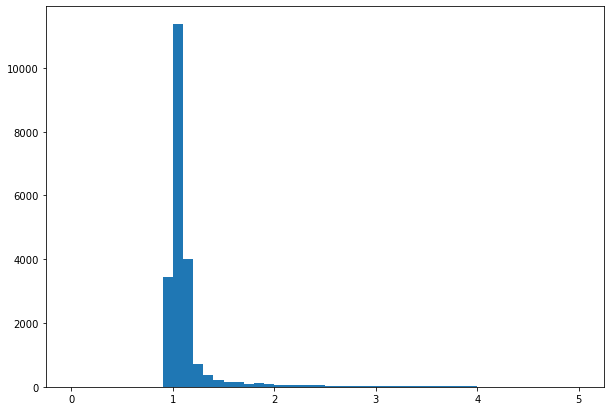

In [126]:
a = df_funnel['feature_8'].values * ( df_funnel['feature_9'] / 100 + 1) 
ratio = df_funnel['feature_7'] / a.values
plt.figure(figsize=(10,7))
plt.hist(ratio, bins=50, range=(0,5))
plt.show()

In [127]:
sum(ratio.values > 2)

792

In [128]:
np.corrcoef(df_funnel['feature_10'].fillna(0).values, df_funnel['feat7_min_feat8'].fillna(0).values)

array([[1.        , 0.55783966],
       [0.55783966, 1.        ]])

# payments.csv

In [456]:
df_payments.head()

client_id      day_dt  sum_rur       pmnts_name
0 -1893104556496814867  2019-06-29   6071.0  Salary receipts
1 -1893104556496814867  2019-08-13  45641.0  Salary receipts
2 -1893104556496814867  2018-10-22   6071.0  Salary receipts
3 -1893104556496814867  2018-09-26   6071.0  Salary receipts
4 -1893104556496814867  2018-09-10   5872.0  Salary receipts

In [448]:
df_payments['pmnts_name'].value_counts()

Salary receipts     181662
Pension receipts      6406
Name: pmnts_name, dtype: int64

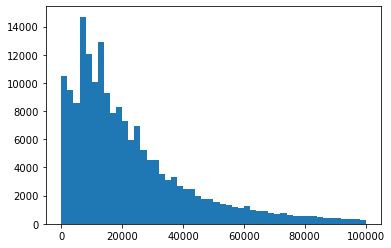

In [451]:
plt.hist(df_payments['sum_rur'], bins=50, range=(0, 1e5))
plt.show()

In [466]:
df_payments["pmnts_name_bool"] = (df_payments["pmnts_name"] == 'Pension receipts').astype('int64')
df_payments_grouped = df_payments.groupby(by="client_id", as_index=False, sort=False)["pmnts_name_bool"]
df_payments_grouped_max = df_payments_grouped.mean()
# df_aum_grouped_max = df_aum_grouped_max.fillna(0)
feat = df_payments_grouped_max["pmnts_name_bool"].values

In [467]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_payments_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_payments_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [468]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[1.       , 0.0228597],
       [0.0228597, 1.       ]])

In [476]:
df_payments_grouped = df_aum.groupby(by="client_id", as_index=False, sort=False)["balance_rur_amt"]
df_payments_grouped_max = df_payments_grouped.max()
df_payments_grouped_max = df_payments_grouped_max.fillna(0)
feat = df_payments_grouped_max["balance_rur_amt"].values

In [477]:
df_funnel_selected = df_funnel.loc[df_funnel['client_id'].isin(df_payments_grouped_max.client_id.values)]
df_funnel_selected_shuffled = df_funnel_selected.set_index('client_id')
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reindex(index=df_payments_grouped_max['client_id'])
df_funnel_selected_shuffled = df_funnel_selected_shuffled.reset_index()

In [478]:
df_payments_grouped_max.tail(10)

client_id  balance_rur_amt
12615  8222970069528967162         248410.0
12616 -7604041374568409903         198728.0
12617 -6437712643557910757          19348.0
12618  -785095133772136227         215337.0
12619  7797789328120269779          33218.0
12620  1409662079905932436          14162.0
12621  8217287127669023182         203973.0
12622 -2542905407750928713          30353.0
12623   161383671559828442         121412.0
12624  7698592600801778619         121412.0

In [479]:
y_selected = df_funnel_selected['sale_flg'].values
np.corrcoef(y_selected, feat)

array([[1.        , 0.00671777],
       [0.00671777, 1.        ]])